In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("cars_info.csv")

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.shape

(4340, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df.value_counts()

name                              year  selling_price  km_driven  fuel    seller_type       transmission  owner       
Renault Duster 85PS Diesel RxL    2013  450000         1000       Diesel  Dealer            Manual        Second Owner    12
Hyundai Verna 1.6 VTVT SX         2015  760000         55340      Petrol  Trustmark Dealer  Manual        First Owner     12
Hyundai Santro GS                 2005  80000          56580      Petrol  Dealer            Manual        First Owner     12
Maruti S-Cross Zeta DDiS 200 SH   2015  750000         45974      Diesel  Trustmark Dealer  Manual        First Owner     12
Maruti SX4 Vxi BSIV               2012  225000         110000     Petrol  Individual        Manual        Second Owner    12
                                                                                                                          ..
Hyundai i20 Asta Option 1.4 CRDi  2016  550000         60000      Diesel  Individual        Manual        First Owner      1
      

In [9]:
df["name"] = df["name"].apply(lambda x : x.split()[0])

In [10]:
df['name'].value_counts()

name
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='selling_price'>

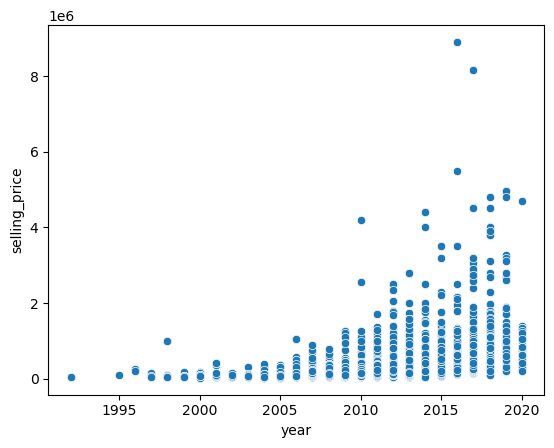

In [11]:
sns.scatterplot(data=df, x = "year", y ="selling_price")

<Axes: xlabel='selling_price', ylabel='Count'>

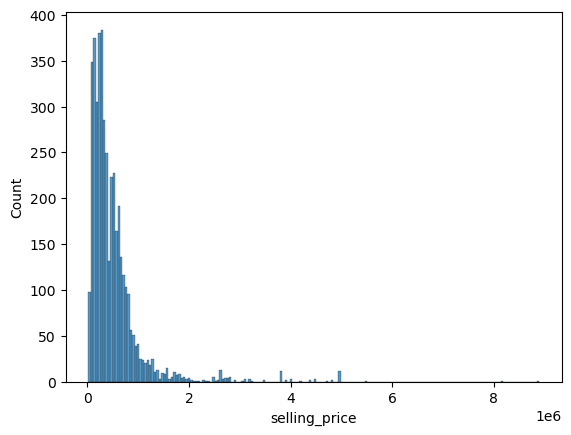

In [12]:
sns.histplot(data=df, x= "selling_price")

In [13]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [14]:
# dropping electric car row 
df = df[df["fuel"]!= "Electric"]

<Axes: xlabel='km_driven', ylabel='selling_price'>

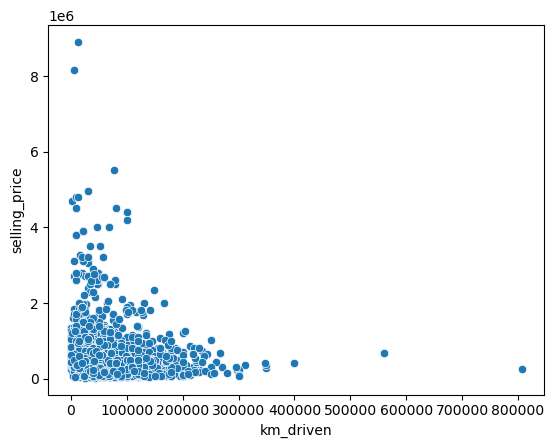

In [15]:
sns.scatterplot(data=df, x = "km_driven", y ="selling_price")

In [16]:
# removing selling_price outlier
df = df[df["selling_price"] < 5000000]

<Axes: xlabel='km_driven', ylabel='Count'>

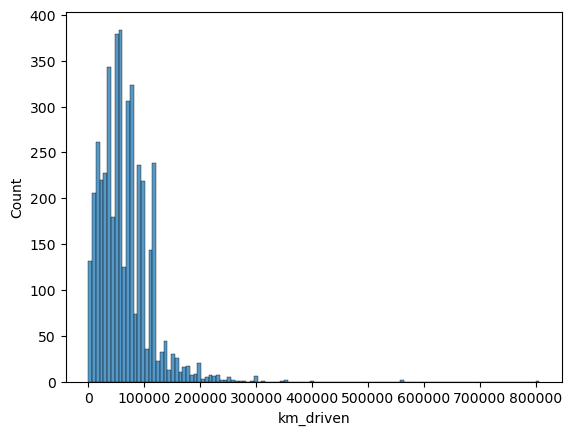

In [17]:
sns.histplot(data=df, x= "km_driven")

In [18]:
# removing km_driven outliers
df = df[df["km_driven"] < 320000]

In [19]:
df['transmission'].value_counts()

transmission
Manual       3885
Automatic     444
Name: count, dtype: int64

In [20]:
df['transmission'] = df['transmission'].map({"Manual":0, "Automatic": 1})

In [21]:
df['owner'].value_counts()

owner
First Owner             2824
Second Owner            1104
Third Owner              303
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [22]:
df = df.join(pd.get_dummies(df["owner"],drop_first=True,dtype=int))

In [23]:
df.drop("owner", axis=1, inplace=True)

In [24]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti,2007,60000,70000,Petrol,Individual,0,0,0,0,0
1,Maruti,2007,135000,50000,Petrol,Individual,0,0,0,0,0
2,Hyundai,2012,600000,100000,Diesel,Individual,0,0,0,0,0
3,Datsun,2017,250000,46000,Petrol,Individual,0,0,0,0,0
4,Honda,2014,450000,141000,Diesel,Individual,0,0,1,0,0


In [25]:
df['seller_type'].value_counts()

seller_type
Individual          3241
Dealer               986
Trustmark Dealer     102
Name: count, dtype: int64

In [26]:
df['seller_type'] = df['seller_type'].map({"Individual":0, "Dealer":1, "Trustmark Dealer": 2})

In [27]:
df["fuel"] = df['fuel'].map({"Diesel": 0, "Petrol":1, "CNG": 2, "LPG":2})

In [28]:
df = df.join(pd.get_dummies(df['year'], drop_first=True, dtype=int))
df.drop("year", axis=1, inplace=True)
df = df.join(pd.get_dummies(df['name'], drop_first=True, dtype=int))
df.drop("name", axis=1, inplace=True)

In [29]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner,1995,...,Mercedes-Benz,Mitsubishi,Nissan,OpelCorsa,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,60000,70000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,135000,50000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,600000,100000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250000,46000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,450000,141000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df.columns = df.columns.astype(str)
X = df.drop("selling_price", axis =1)
# X = df.drop(["name","selling_price"], axis =1)
y = df["selling_price"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
linear_model = LinearRegression()

In [35]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [36]:
l_predictions = linear_model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
print(np.sqrt(mean_squared_error(y_test, l_predictions)))
print(r2_score(y_test, l_predictions))

297587.1332623964
0.7171631288714897


In [39]:
df['selling_price'].mean()

499427.70455070457

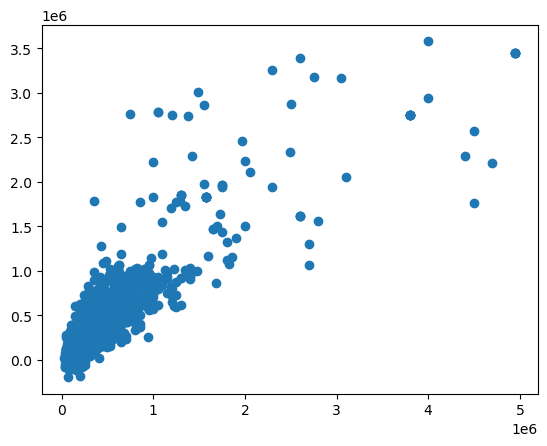

In [49]:
plt.scatter(x=y_test, y=l_predictions)

In [50]:
from sklearn.linear_model import Lasso

In [51]:
lasso = Lasso(max_iter=50000)

In [52]:
lasso.fit(X_train, y_train)

Lasso(max_iter=50000)

In [53]:
predictions = lasso.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
print(np.sqrt(mean_squared_error(y_test, predictions)))
print(r2_score(y_test, predictions))

297605.87668979727
0.7171274989754421


In [56]:
df['selling_price'].mean()

499427.70455070457

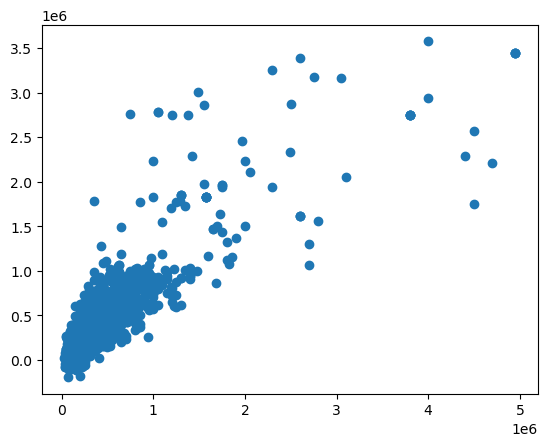

In [57]:
plt.scatter(x=y_test, y=predictions)